In [1]:
import yt
import matplotlib.pyplot as plt
import numpy as np
import cPickle
import re
import trident
from astropy.io import fits
from astropy.table import Table
from cloud_utils import *

In [2]:
fn1 = '/Users/lcorlies/Documents/CGM_Research/spectra/hlsp_misty_foggie_halo008508_rd0020_i032.5_dx11.73_v2_los.fits'
hdu1 = fits.open(fn1)
fn = '/Users/lcorlies/data/Molly/nref11n_nref10f_refine200kpc_z4to2/RD0020/RD0020'
ds = yt.load(fn)
trident.add_ion_fields(ds, ions=['Si II', 'Si III', 'Si IV', 'C II','C III', 'C IV', 'O VI', 'Mg II','Ne VIII'])

yt : [INFO     ] 2019-02-01 15:51:19,620 Parameters: current_time              = 154.801032717
yt : [INFO     ] 2019-02-01 15:51:19,622 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-02-01 15:51:19,624 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-02-01 15:51:19,628 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-02-01 15:51:19,630 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-02-01 15:51:19,634 Parameters: current_redshift          = 1.99999968795
yt : [INFO     ] 2019-02-01 15:51:19,635 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2019-02-01 15:51:19,636 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2019-02-01 15:51:19,637 Parameters: hubble_constant           = 0.695
Parsing Hierarchy : 100%|██████████| 2177/2177 [00:00<00:00, 2606.78it/s]
yt : [INFO     ] 2019-02-01 15:51:20,588 Gathering a field list (this may take a moment.)
/Users/lcorlies/repos/q

In [4]:
start,end = parse_for_ray_parameters(fn1) 

In [5]:
ray = ds.ray(start,end)
ids = np.argsort(ray['z'])

In [36]:
ion_to_use = ray['H_p0_number_density']*ray['dz'].in_units('cm')
threshold,num_cells_above = get_fion_threshold(ion_to_use,0.85)

In [37]:
print threshold,num_cells_above

1.1097537104074166e+16 cm**(-2) 12


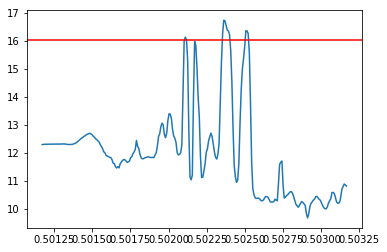

In [39]:
plt.plot(ray['z'][ids],np.log10(ion_to_use[ids]))
plt.axhline(y=np.log10(threshold),color='red')
#plt.ylim(16,17)